In [1]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.neural_network import BernoulliRBM
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

In [2]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [3]:
y_train.shape

(60000,)

In [4]:
model = BernoulliRBM()
clf = LogisticRegression()
rbm_logistic_classifier = Pipeline(
    steps=[('model', model), ('clf', clf)])

In [5]:
model.n_components = 500

In [6]:
rbm_logistic_classifier.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('model', BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=500, n_iter=10,
       random_state=None, verbose=0)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [7]:
y_pred = rbm_logistic_classifier.predict(X_test)

In [8]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       980
          1       0.99      0.99      0.99      1135
          2       0.97      0.96      0.96      1032
          3       0.95      0.96      0.96      1010
          4       0.98      0.95      0.97       982
          5       0.97      0.95      0.96       892
          6       0.98      0.98      0.98       958
          7       0.98      0.95      0.96      1028
          8       0.92      0.97      0.94       974
          9       0.94      0.95      0.94      1009

avg / total       0.97      0.96      0.97     10000



In [9]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
y_pred1 = clf.predict(X_test)

In [12]:
print(classification_report(y_test, y_pred1))

             precision    recall  f1-score   support

          0       0.95      0.98      0.96       980
          1       0.96      0.98      0.97      1135
          2       0.94      0.89      0.91      1032
          3       0.89      0.91      0.90      1010
          4       0.92      0.93      0.93       982
          5       0.89      0.86      0.88       892
          6       0.94      0.95      0.94       958
          7       0.93      0.92      0.93      1028
          8       0.87      0.88      0.87       974
          9       0.90      0.89      0.89      1009

avg / total       0.92      0.92      0.92     10000



In [13]:
W = model.components_

In [16]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

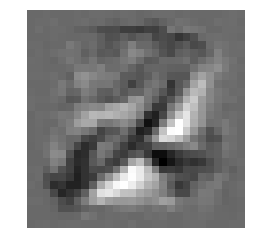

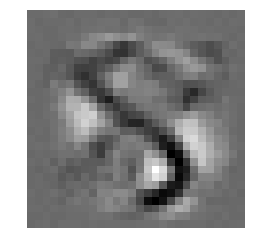

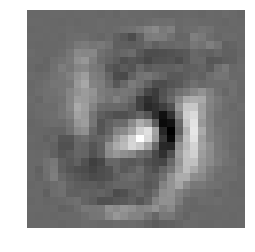

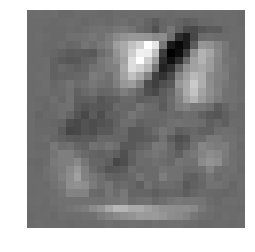

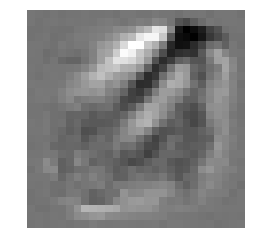

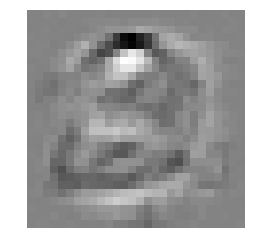

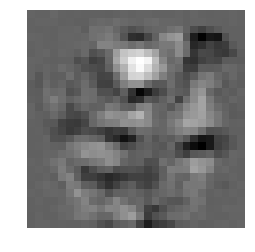

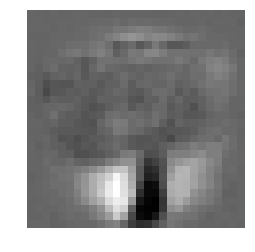

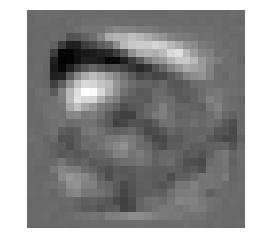

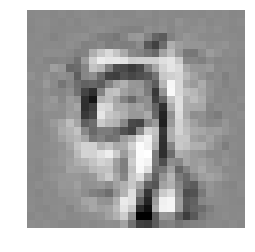

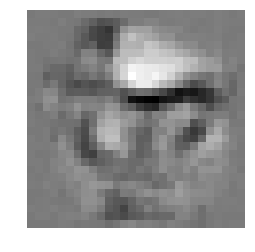

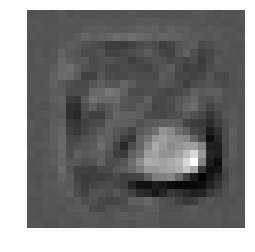

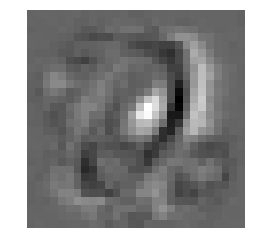

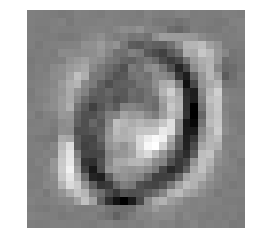

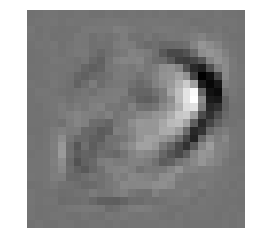

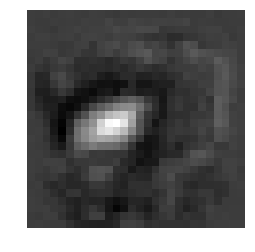

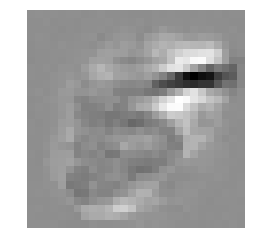

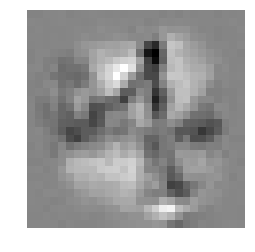

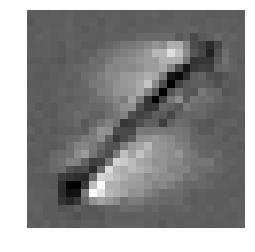

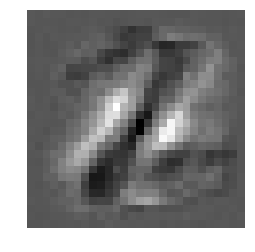

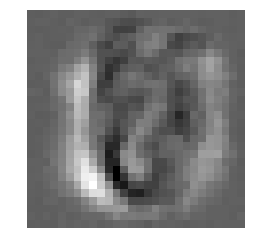

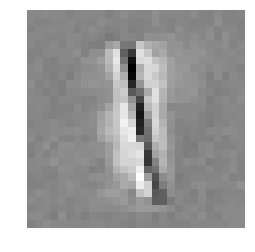

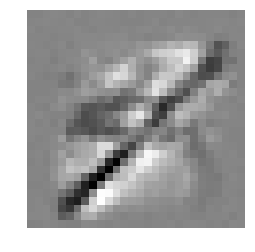

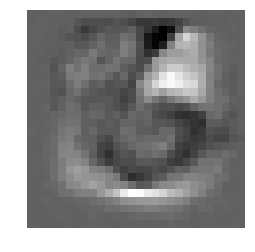

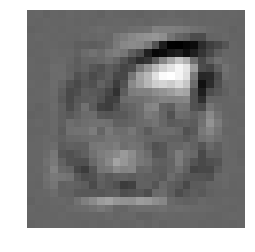

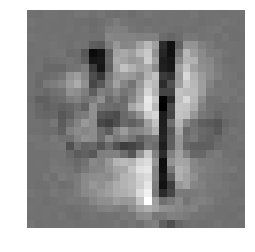

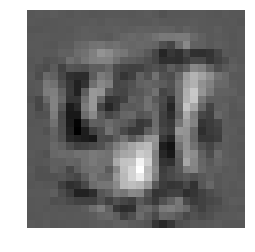

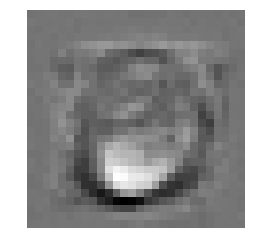

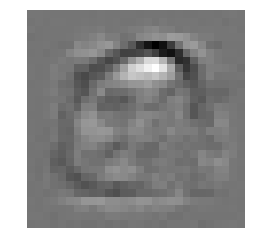

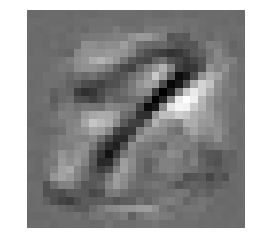

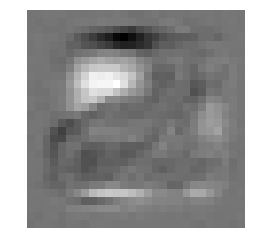

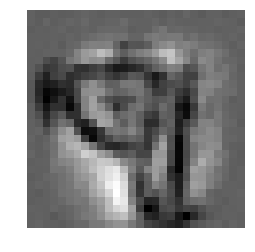

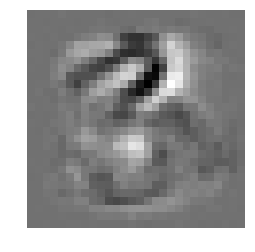

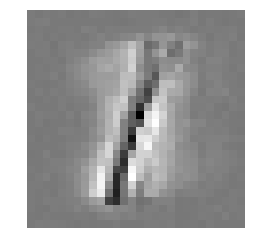

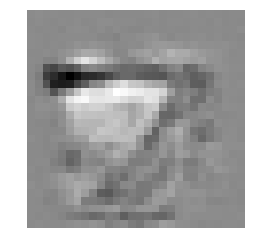

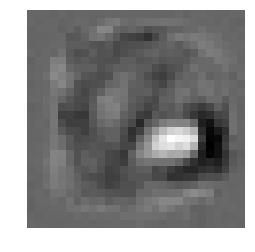

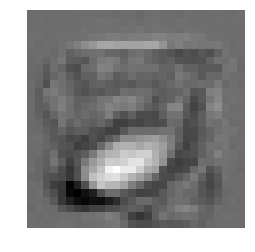

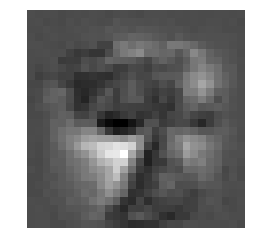

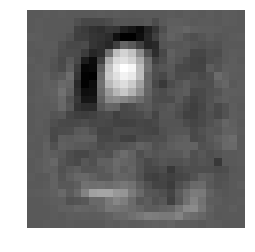

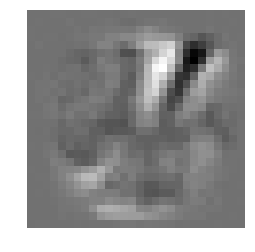

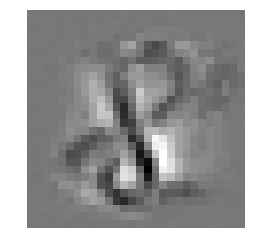

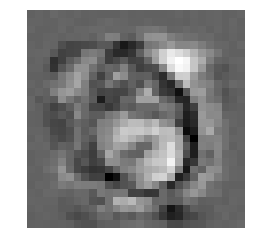

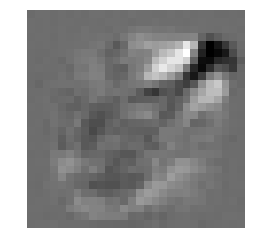

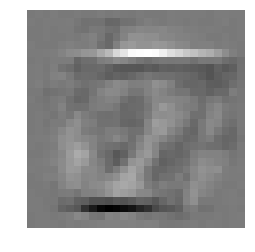

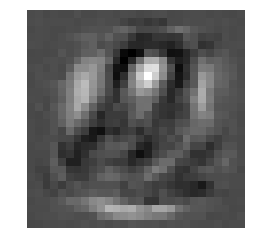

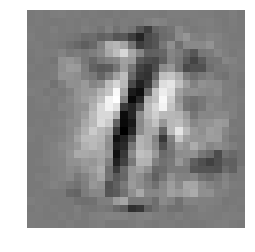

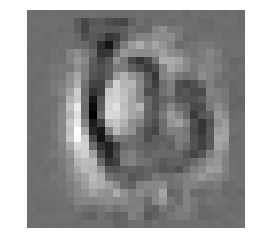

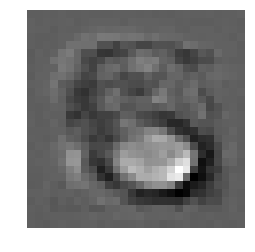

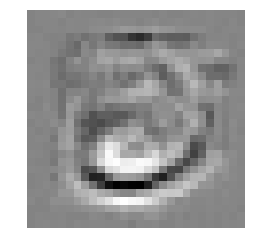

In [28]:
for i in range(49):
    c = W[i, :].reshape(28,28)
    plt.imshow(c, cmap = matplotlib.cm.binary,interpolation="nearest")
    plt.axis("off")
    plt.show()
